In [2]:
import sympy as sp
from scipy.integrate import odeint, quad, dblquad, solve_ivp
from scipy.optimize import fsolve, root
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.sans-serif"] = ["FangSong"]
plt.rcParams["axes.unicode_minus"] = False
plt.style.use("ggplot")

# `numpy` 解线性方程组

In [15]:
A = np.array([[10, -1, -2], [-1, 10, -2], [-1, -1, 5]])
b = np.array([[72], [83], [42]])
x = np.linalg.solve(A, b)
x

array([[11.],
       [12.],
       [13.]])

In [17]:
y = np.linalg.inv(A) @ b
y

array([[11.],
       [12.],
       [13.]])

# 用 `sympy` 符号计算

进行积分运算。
$$
f(x) = x^2 + 2 x + 1

In [20]:
x = sp.symbols("x")
f = sp.symbols("f", cls=sp.Function)
f = x**2 + 2 * x + 1
integral_f = sp.integrate(f, x)
integral_f

x**3/3 + x**2 + x

在进行积分计算，正数：
$$
f(x) = \dfrac{1}{x^2 + a}

In [21]:
x = sp.symbols("x")
a = sp.symbols("a", positive=True)
f = sp.symbols("f", cls=sp.Function)
f = 1 / (x**2 + a)
integral_f = sp.integrate(f, x)
integral_f

atan(x/sqrt(a))/sqrt(a)

In [24]:
x, a, b, c = sp.symbols("x, a, b, c")
res = sp.solveset(a * x**2 + b * x + c, x)
res

{-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a)}

$$
a x^2 + b x = -c

In [25]:
x, a, b, c = sp.symbols("x, a, b, c")
f = sp.symbols("f", cls=sp.Function)
f = sp.Eq(a * x**2 + b * x, -c)
res = sp.solveset(f, x)
res

{-b/(2*a) - sqrt(-4*a*c + b**2)/(2*a), -b/(2*a) + sqrt(-4*a*c + b**2)/(2*a)}

In [36]:
x, y = sp.symbols("x y")
res = sp.solve([x + y - 35, x * 2 + y * 4 - 94], x, y)
res

{x: 23, y: 12}

In [37]:
x, y = sp.symbols("x y")

eq1 = sp.Eq(x + y, 35)
eq2 = sp.Eq(2 * x + 4 * y, 94)

res = sp.linsolve([eq1, eq2], (x, y))

res

{(23, 12)}

在实数域内求解非线性方程组。

In [38]:
a, b, c, d = sp.symbols("a, b, c, d", real=True)
res = sp.nonlinsolve([a**2 + a + b, a - b], [a, b])
res

{(-2, -2), (0, 0)}

In [39]:
res = sp.nonlinsolve([sp.sin(a) - a], a)
res

{(ConditionSet(a, Eq(-a + sin(a), 0), Complexes),)}

进行微分计算：


In [41]:
f = sp.symbols("f", cls=sp.Function)
x = sp.symbols("x")
f = lambda x: sp.sin(x) / x
f(x).diff(x)

cos(x)/x - sin(x)/x**2

In [42]:
f, g = sp.symbols("f, g", cls=sp.Function)
x = sp.symbols("x")
g = lambda x: sp.sin(x)
f = lambda t: t / x 
f(g(x)).diff(x)

cos(x)/x - sin(x)/x**2

# `scipy` 数值运算
$$
\begin{cases}
\cos \beta = \dfrac{L_2^2 + L_1^2 - L_3^2}{2L_2L_3} \\
p_2^2 = (x + L_3 \cos \theta - x_1)^2 + (y + L_3 \sin \theta)^2 \\
p_3^2 = [x + L_2 \cos(\beta + \theta) - x_2]^2 + [y + L_2 \sin(\beta + \theta) - y_2]^2 \\ 
p_1^2 = x^2 + y^2
\end{cases}

In [49]:
def func(args):
    x, y, theta = args[0], args[1], args[2]
    return np.array(
        [
            (x + 3 * np.cos(theta) - 5) ** 2 + (y + 3 * np.sin(theta)) ** 2 - 25,
            x**2 + y**2 - 25,
            (x + 3 * np.cos(np.pi / 3 + theta)) ** 2
            + (y + 3 * np.sin(np.pi / 3 + theta) - 6) ** 2
            - 9,
        ]
    )


res = fsolve(func, [-1.37, 4.80, 0.12])
res

array([1.15769945, 4.86412705, 0.02143414])

In [52]:
res = root(func, [-1.37, 4.00, 0.12])
res

 message: The solution converged.
 success: True
  status: 1
     fun: [-1.243e-11 -1.480e-11 -6.935e-12]
       x: [ 1.158e+00  4.864e+00  2.143e-02]
    nfev: 26
    fjac: [[ 3.008e-01 -4.774e-01 -8.256e-01]
           [ 8.291e-01  5.587e-01 -2.095e-02]
           [-4.713e-01  6.782e-01 -5.639e-01]]
       r: [-4.886e+00 -4.890e+00 -9.509e+00  1.395e+01  5.609e+01
           -1.368e+01]
     qtf: [ 3.654e-10 -7.160e-10 -3.404e-12]

In [3]:
def func(x, n, k):
    return x * n**k


data = quad(func, 0, 2, args=(2, 3))
data

(16.0, 1.7763568394002505e-13)

In [4]:
def func(x, y):
    return 3 * (x**2) * (y**2)


def hfun(x):
    return 1 - x**2


data = dblquad(func, 0, 1, gfun=0, hfun=hfun)
data[0]

0.050793650793650794

# 符号解：`sympy` 

In [5]:
y = sp.symbols("y", cls=sp.Function)
x = sp.symbols("x")
eq = sp.Eq(y(x).diff(x, 2) + 2 * y(x).diff(x, 1) + y(x), x**2)
sp.dsolve(eq, y(x))

Eq(y(x), x**2 - 4*x + (C1 + C2*x)*exp(-x) + 6)

In [7]:
t = sp.symbols("t")
x1, x2, x3 = sp.symbols("x1, x2, x3", cls=sp.Function)
eq1 = sp.Eq(x1(t).diff(t), 2 * x1(t) - 3 * x2(t) + 3 * x3(t))
eq2 = sp.Eq(x2(t).diff(t), 4 * x1(t) - 5 * x2(t) + 3 * x3(t))
eq3 = sp.Eq(x3(t).diff(t), 4 * x1(t) - 4 * x2(t) + 2 * x3(t))
ics = {x1(0): 1, x2(0): 2, x3(0): 3}
sp.dsolve([eq1, eq2, eq3], ics=ics)

[Eq(x1(t), 2*exp(2*t) - exp(-t)),
 Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)),
 Eq(x3(t), 2*exp(2*t) + exp(-2*t))]

In [8]:
x = sp.Matrix([x1(t), x2(t), x3(t)])
A = sp.Matrix([[2, -3, 3], [4, -5, 3], [4, -4, 2]])
eq = x.diff(t) - A * x
res = sp.dsolve(eq, ics={x1(0): 1, x2(0): 2, x3(0): 3})
res

[Eq(x1(t), 2*exp(2*t) - exp(-t)),
 Eq(x2(t), 2*exp(2*t) - exp(-t) + exp(-2*t)),
 Eq(x3(t), 2*exp(2*t) + exp(-2*t))]

# 数值解：`scipy` 

Text(0, 0.5, 'y')

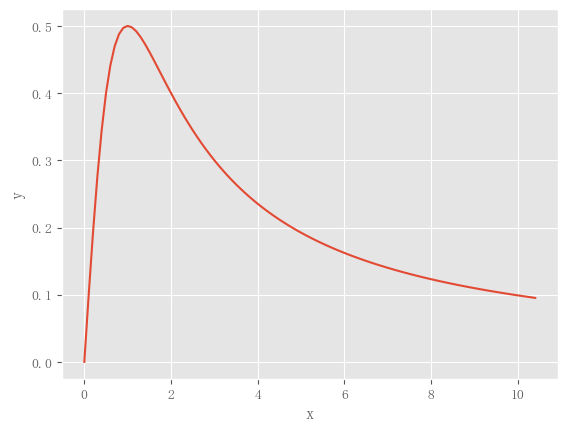

In [13]:
dy_x = lambda y, x: 1 / (1 + x**2) - 2 * y**2
x = np.arange(0, 10.5, 0.1)
y = odeint(dy_x, 0, x)
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")

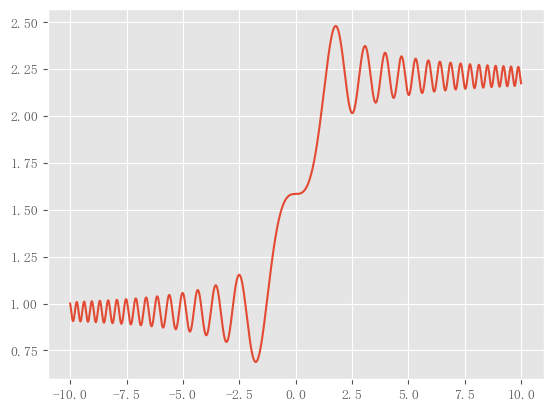

In [14]:
dy_dt = lambda y, t: np.sin(t**2)
t = np.arange(-10, 10, 0.01)
y = odeint(dy_dt, 1, t)
plt.plot(t, y)

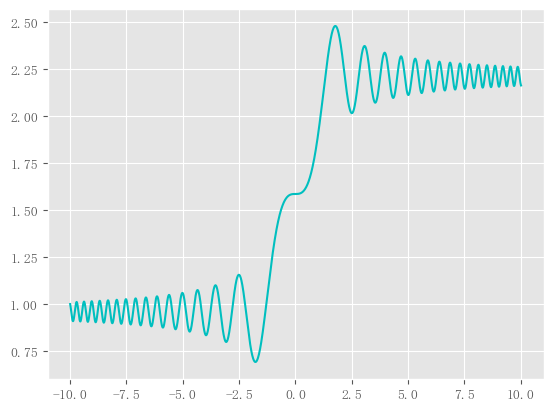

In [15]:
dt = 0.01 
t0 = -10.0
y0 = 1
t_last = 10.0 

t_list = [t0]
y_list = [y0]

t = t0 
y = y0 

while t < t_last:
    t += dt 
    y += dt * np.sin(t ** 2)
    t_list.append(t)
    y_list.append(y)

plt.plot(t_list, y_list, "c")
plt.show()

$$
\begin{cases}
y'' - 20(1 - y^2)y' + y = 0 \\
y(0) = 0,\ y'(0) = 2
\end{cases}

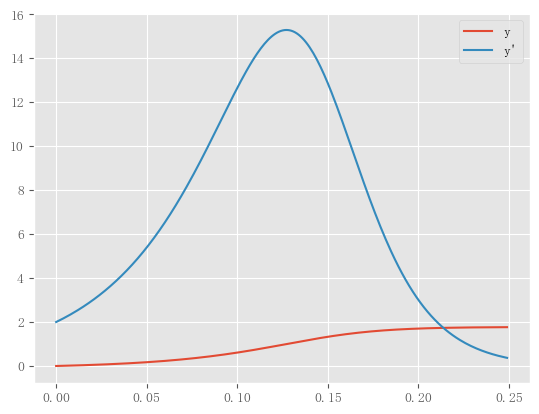

In [4]:
def fvdp(y, t):
    dy1 = y[1]
    dy2 = 20 * (1 - y[0] ** 2) * y[1] - y[0]
    return np.array([dy1, dy2])


x = np.arange(0, 0.25, 0.001)
y0 = np.array([0.0, 2.0])
y = odeint(fvdp, y0, x)

plt.plot(x, y[:, 0], label="y")
plt.plot(x, y[:, 1], label="y'")
plt.legend()

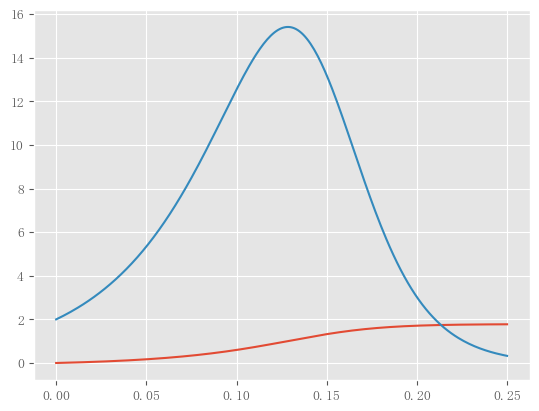

In [6]:
x0 = 0
x_last = 0.25
dx = 0.001
y0 = 0
yp0 = 2

x_list = [x0]
y_list = [y0]
yp_list = [yp0]

x = x0
y = y0
yp = yp0

while x < x_last:
    y_ = y + dx * yp
    yp_ = yp + dx * (20 * (1 - y**2) * yp - y)
    x += dx
    y = y_
    yp = yp_
    x_list.append(x)
    y_list.append(y)
    yp_list.append(yp)

plt.plot(x_list, y_list, label="y")
plt.plot(x_list, yp_list, label="y'")

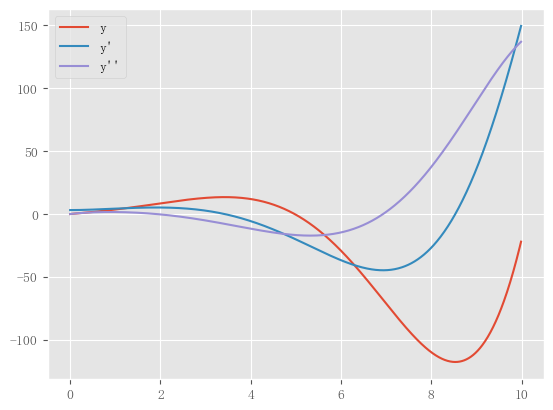

In [10]:
def func(y, t):
    dy1, dy2 = y[1], y[2]
    dy3 = np.cos(t) + dy1 - dy2 - y[0]
    return np.array([dy1, dy2, dy3])


x = np.arange(0, 10, 0.01)
y0 = np.array([0, np.pi, 0])
y = odeint(func, y0, x)
plt.plot(x, y[:, 0], label="y")
plt.plot(x, y[:, 1], label="y'")
plt.plot(x, y[:, 2], label="y''")
plt.legend()


$$
\begin{cases}
y''' + y'' - y' + y = \cos t \\
y(0) = 0,\ y'(0) = \pi,\ y''(0) = 0
\end{cases}

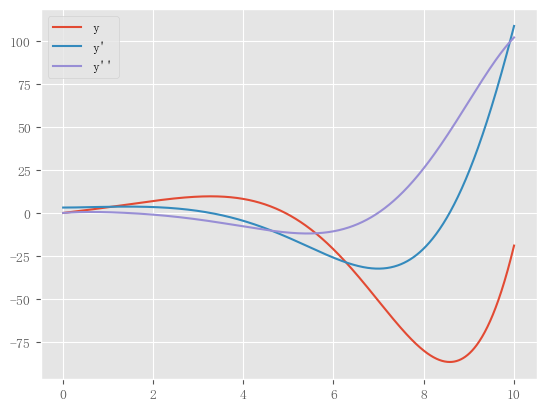

In [11]:
x0 = 0
x_last = 10
dx = 0.01
y0 = 0
yp0 = np.pi
ypp0 = 0

x_list = [x0]
y_list = [y0]
yp_list = [yp0]
ypp_list = [ypp0]

x = x0
y = y0
yp = yp0
ypp = ypp0

while x < x_last:
    y_ = y + dx * yp
    yp_ = yp + dx * ypp
    ypp_ = ypp + dx * (yp - ypp - y - np.cos(x))
    x += dx
    y = y_
    yp = yp_
    ypp = ypp_
    x_list.append(x)
    y_list.append(y)
    yp_list.append(yp)
    ypp_list.append(ypp)

plt.plot(x_list, y_list, label="y")
plt.plot(x_list, yp_list, label="y'")
plt.plot(x_list, ypp_list, label="y''")
plt.legend()

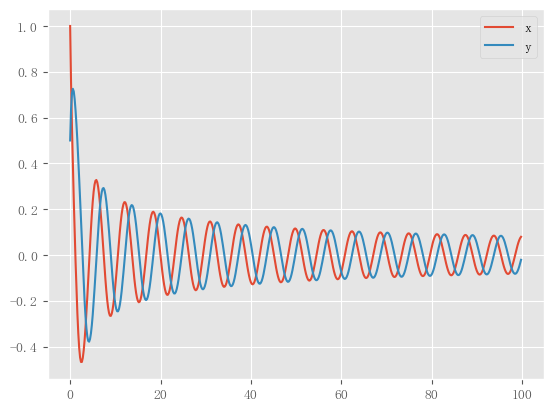

In [13]:
def func(t, w):
    x = w[0]
    y = w[1]
    return np.array([-(x**3) - y, -(y**3) + x])


y0 = [1, 0.5]

res = solve_ivp(func, (0, 100), y0, method="RK45", t_eval=np.arange(0, 100, 0.2))
t = res.t
y = res.y
plt.plot(t, y[0, :], label="x")
plt.plot(t, y[1, :], label="y")
plt.legend()

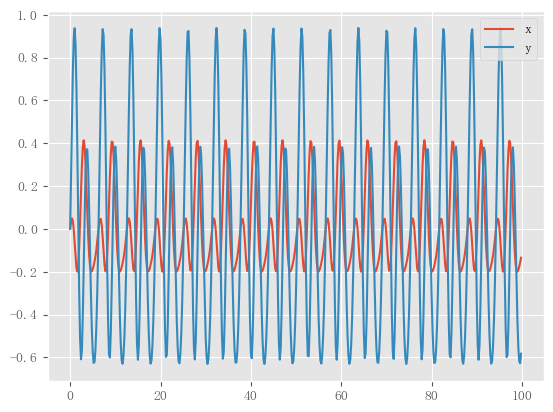

In [4]:
def func(w, t):
    x = w[0]
    y = w[1]
    dx = w[2]
    dy = w[3]
    dx2 = -dy - 3 * x + np.cos(2 * t)
    dy2 = 4 * dx - 3 * y + np.sin(2 * t)
    return np.array([dx, dy, dx2, dy2])


y0 = [0, 0, 1 / 5, 6 / 5]
t = np.arange(0, 100, 0.2)
y = odeint(func, y0, t)
plt.plot(t, y[:, 0], label="x")
plt.plot(t, y[:, 1], label="y")

plt.legend()

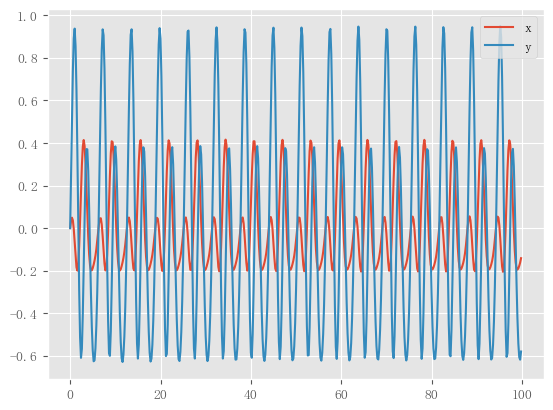

In [6]:
res = solve_ivp(
    lambda t, w: func(w, t),
    t_span=(0, 100),
    t_eval=np.arange(0, 100, 0.2),
    y0=y0,
    method="LSODA",
)
t = res.t
y = res.y
plt.plot(t, y[0, :], label="x")
plt.plot(t, y[1, :], label="y")
plt.legend()

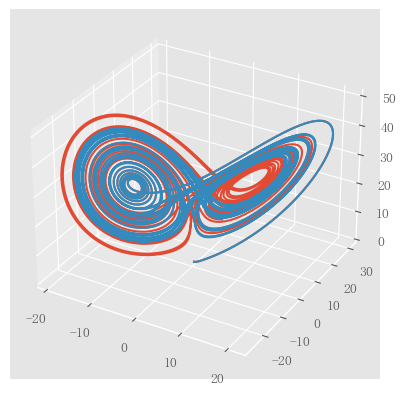

In [12]:
def func(point, t, args):
    p, r, b = args
    x, y, z = point
    return np.array([p * (y - x), x * (r - z), x * y - b * z])


t = np.arange(0, 30, 0.001)
p1 = odeint(func, (0.0, 1.0, 0.0), t, args=([10.0, 28.0, 3.0],))
p2 = odeint(func, (0.0, 1.01, 0.0), t, args=([10.0, 28.0, 3.0],))

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot(p1[:, 0], p1[:, 1], p1[:, 2])
ax.plot(p2[:, 0], p2[:, 1], p2[:, 2])

# 传染病模型

## SI

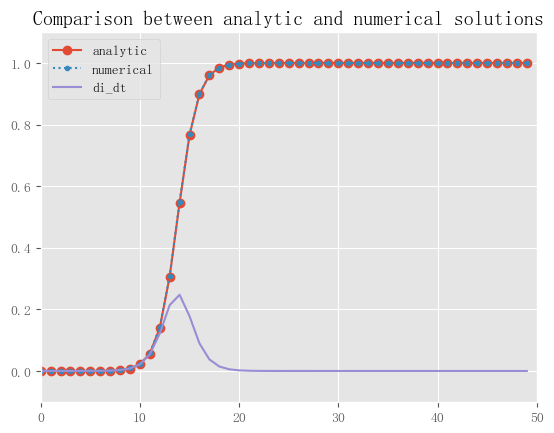

In [20]:
def di_dt(i, t, lamda, mu):
    di_dt = lamda * i * (1 - i)
    return di_dt


# 初始参数
n = 1e7  # 总人数
lamda = 1.0  # 日接触率，患者每天有效接触的易感者的平均人数
mu = 0.5  # 日治愈率，每天被治愈的患病者人数占患病者总数的比例
i0 = 1e-6  # 患病者的初值
t_end = 50  # 预测日期长度
t = np.arange(0.0, t_end, 1)  # (start, stop, step)

i_analy = 1 / (1 + (1 / i0 - 1) * np.exp(-lamda * t))
i_integ = odeint(di_dt, i0, t, args=(lamda, mu))
i_deriv = lamda * i_integ * (1 - i_integ)

# 绘图
plt.plot(t, i_analy, "-o", label="analytic")
plt.plot(t, i_integ, ":.", label="numerical")
plt.plot(t, i_deriv, "-", label="di_dt")
plt.title("Comparison between analytic and numerical solutions")
plt.legend()
plt.axis([0, 50, -0.1, 1.1])
plt.show()

## SIS

$$
\dfrac{di(t)}{dt} = \lambda s(t) i(t) - \alpha i(t) \\
s(t) + i(t) = 1

Text(0, 0.5, 'Proportion')

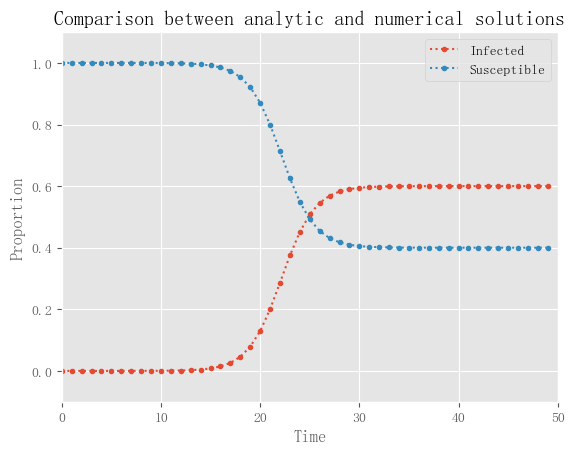

In [22]:
def SIS(i, t, lamda, mu):
    di_dt = lamda * i * (1 - i) - mu * i
    return di_dt


lamda = 1.0
mu = 0.4
i0 = 1e-6
t_end = 50
t = np.arange(0.0, t_end, 1)

y_sis = odeint(SIS, i0, t, args=(lamda, mu))
plt.plot(t, y_sis, ":.", label="Infected")
plt.plot(t, 1 - y_sis, ":.", label="Susceptible")
plt.title("Comparison between analytic and numerical solutions")
plt.legend()
plt.axis([0, 50, -0.1, 1.1])
plt.xlabel("Time")
plt.ylabel("Proportion")

## SIR 

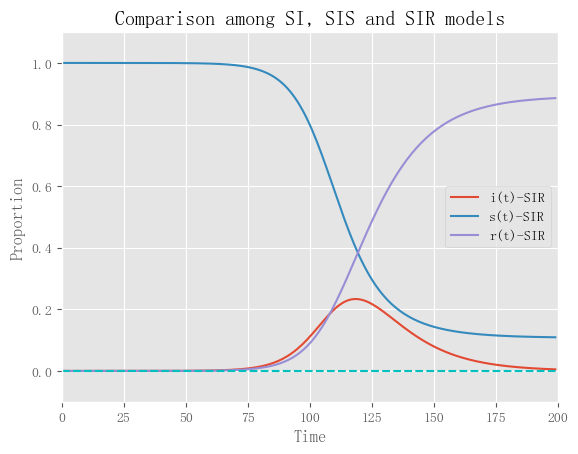

In [27]:
def SIR(y, t, lamda, mu):
    i, s = y
    di_dt = lamda * s * i - mu * i
    ds_dt = -lamda * s * i
    return [di_dt, ds_dt]


lamda = 0.2
sigma = 2.5
mu = lamda / sigma
t = np.arange(0.0, t_end, 1)
i0 = 1e-6
s0 = 1 - i0
y0 = (i0, s0)
y_sir = odeint(SIR, y0, t, args=(lamda, mu))
plt.plot(t, y_sir[:, 0], "-", label="i(t)-SIR")
plt.plot(t, y_sir[:, 1], "-", label="s(t)-SIR")
plt.plot(t, 1 - y_sir[:, 0] - y_sir[:, 1], "-", label="r(t)-SIR")
plt.legend()
plt.title("Comparison among SI, SIS and SIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.axhline(y=0, ls="--", c="c")
plt.show()

## SEIR

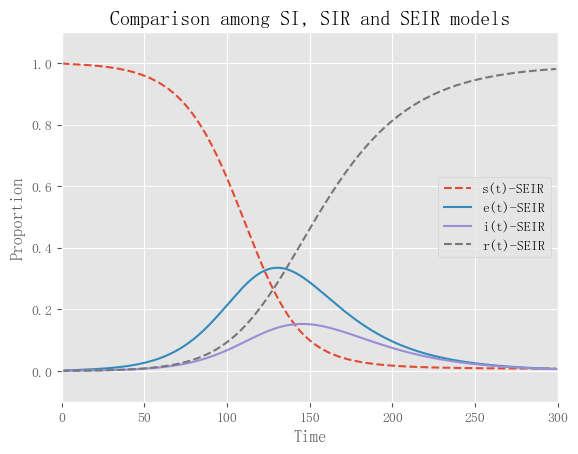

In [29]:
def SEIR(y, t, lamda, delta, mu):
    s, e, i = y
    ds_dt = -lamda * s * i
    de_dt = lamda * s * i - delta * e
    di_dt = delta * e - mu * i
    return np.array([ds_dt, de_dt, di_dt])


lamda = 0.3
delta = 0.03
mu = 0.06
t_end = 300
t = np.arange(0, t_end, 1)
i0 = 1e-3
e0 = 1e-3
s0 = 1 - i0 - e0
y0 = (s0, e0, i0)
y_seir = odeint(SEIR, y0, t, args=(lamda, delta, mu))

plt.title("Comparison among SI, SIR and SEIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.plot(t, y_seir[:, 0], "--", label="s(t)-SEIR")
plt.plot(t, y_seir[:, 1], "-", label="e(t)-SEIR")
plt.plot(t, y_seir[:, 2], "-", label="i(t)-SEIR")
plt.plot(t, 1 - y_seir[:, 0] - y_seir[:, 1] - y_seir[:, 2], "--", label="r(t)-SEIR")
plt.legend()
plt.show()

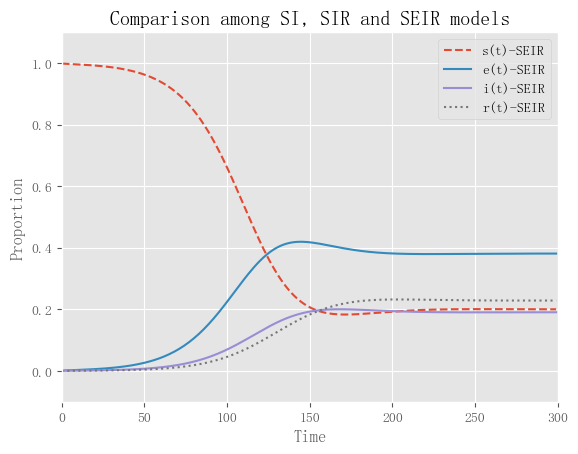

In [31]:
def SEIRS(y, t, lamda, delta, mu, recover):
    s, e, i, r = y
    ds_dt = -lamda * s * i + recover * r
    de_dt = lamda * s * i - delta * e
    di_dt = delta * e - mu * i
    dr_dt = mu * i - recover * r
    return [ds_dt, de_dt, di_dt, dr_dt]


lamda = 0.3
delta = 0.03
mu = 0.06
recover = 0.05
t_end = 300
t = np.arange(0.0, t_end, 1)
i0 = 1e-3
e0 = 1e-3
s0 = 1 - i0 - e0
r0 = 0
y0 = [s0, e0, i0, r0]
y_seirs = odeint(SEIRS, y0, t, args=(lamda, delta, mu, recover))
plt.title("Comparison among SI, SIR and SEIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.plot(t, y_seirs[:, 0], "--", label="s(t)-SEIR")
plt.plot(t, y_seirs[:, 1], "-", label="e(t)-SEIR")
plt.plot(t, y_seirs[:, 2], "-", label="i(t)-SEIR")
plt.plot(t, y_seirs[:, 3], ":", label="r(t)-SEIR")
plt.legend()
plt.show()

## SEIRD

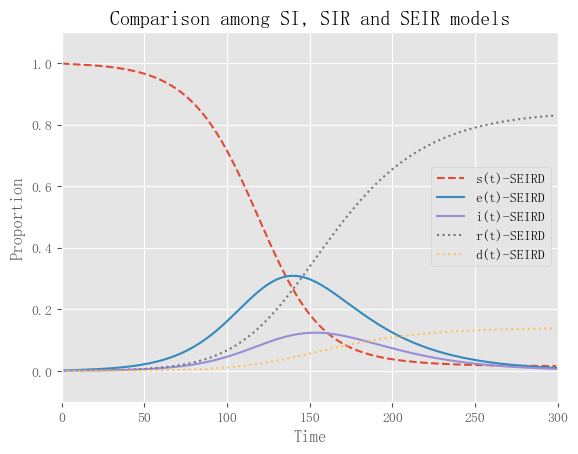

In [32]:
def SEIRD(y, t, lamda, delta, mu, delth):
    s, e, i, r, d = y
    ds_dt = -lamda * s * i
    de_dt = lamda * s * i - delta * e
    di_dt = delta * e - mu * i - delth * i
    dr_dt = mu * i
    dd_dt = delth * i
    return [ds_dt, de_dt, di_dt, dr_dt, dd_dt]


lamda = 0.3
delta = 0.03
mu = 0.06
delth = 0.01
t_end = 300
t = np.arange(0, t_end, 1)
i0 = 1e-3
e0 = 1e-3
s0 = 1 - i0 - e0
y0 = [s0, e0, i0, 0, 0]

y_seird = odeint(SEIRD, y0, t, args=(lamda, delta, mu, delth))
plt.title("Comparison among SI, SIR and SEIR models")
plt.xlabel("Time")
plt.ylabel("Proportion")
plt.axis([0, t_end, -0.1, 1.1])
plt.plot(t, y_seird[:, 0], "--", label="s(t)-SEIRD")
plt.plot(t, y_seird[:, 1], "-", label="e(t)-SEIRD")
plt.plot(t, y_seird[:, 2], "-", label="i(t)-SEIRD")
plt.plot(t, y_seird[:, 3], ":", label="r(t)-SEIRD")
plt.plot(t, y_seird[:, 4], ":", label="d(t)-SEIRD")
plt.legend()
plt.show()

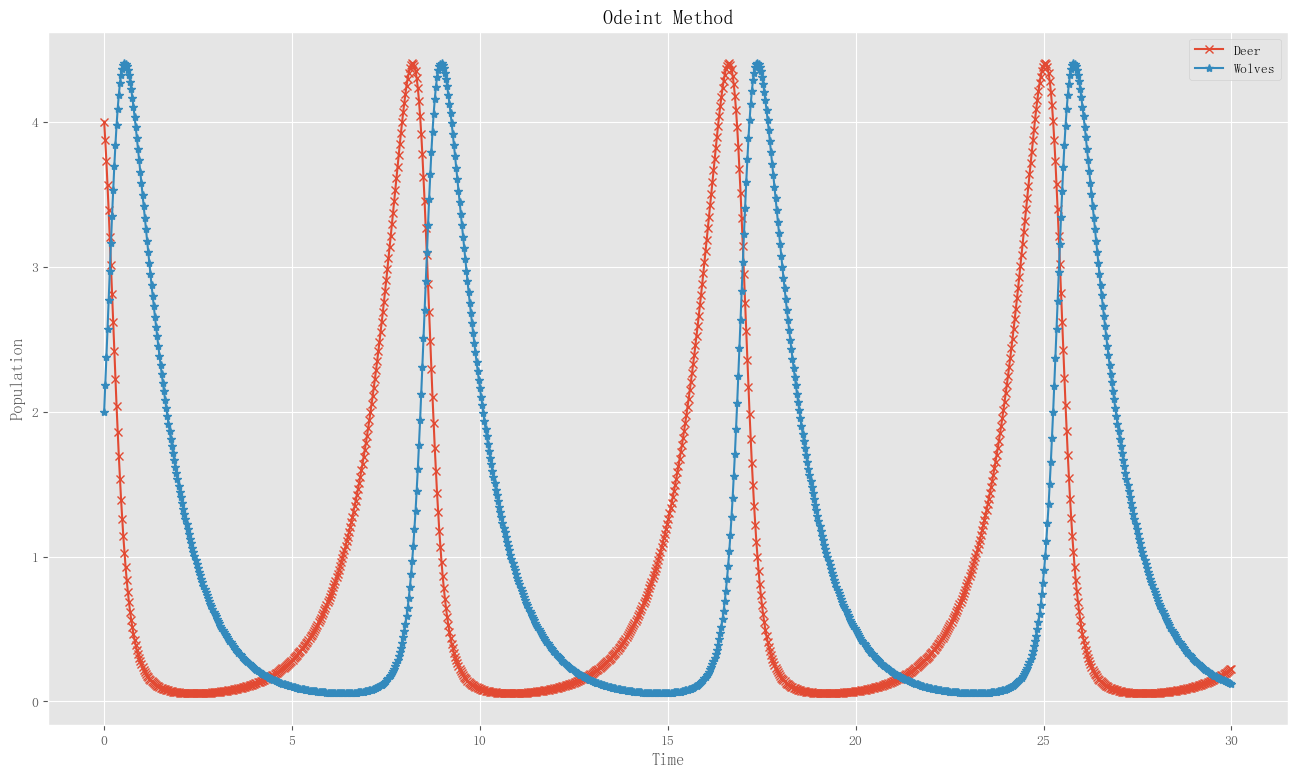

In [35]:
def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return [dotx, doty]


alpha = 1
beta = 1
delta = 1
gamma = 1
x0 = 4.0
y0 = 2.0

Nt = 1000
tmax = 30.0
t = np.linspace(0.0, tmax, Nt)
X0 = [x0, y0]
res = odeint(derivative, X0, t, args=(alpha, beta, delta, gamma))
x, y = res.T
plt.figure(figsize=(16, 9))
plt.title("Odeint Method")
plt.plot(t, x, "x-", label="Deer")
plt.plot(t, y, "*-", label="Wolves")
plt.ylabel("Population")
plt.xlabel("Time")
plt.legend()

Text(0.5, 1.0, 'Deer vs Wolves')

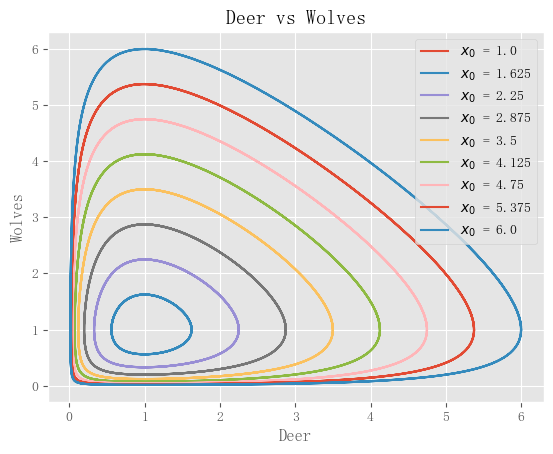

In [38]:
plt.figure()
IC = np.linspace(1.0, 6.0, 9)
for deer in IC:
    X0 = [deer, 1.0]
    Xs = odeint(derivative, X0, t, args=(alpha, beta, delta, gamma))
    x, y = Xs.T
    plt.plot(x, y, "-", label="$x_0$" + " = " + str(X0[0]))
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.legend()
plt.title("Deer vs Wolves")